# Setup

## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

## Help Functions

In [ ]:
# Help functions
def plot_graph(graph, pos=None):
    plt.figure(figsize=(6,6))
    pos = {(x,y):(y,-x) for x,y in graph.nodes()}
    nx.draw(graph, pos=pos, 
            node_color='lightgreen', 
            with_labels=True,
            node_size=600)
    
def is_connected_subgraph(G, nodes=None):
    if type(G) == 'networkx.classes.graph.Graph':
        subG = G.subgraph(nodes)
        return nx.is_connected(subG)
    return "undefined function for this type of graph"

def adjacent_8(G, node):
    """
    Returns the 8 adjacent nodes of a given node in a graph.
    """
    x, y = node
    adj = [(x-1, y-1),  (x-1, y),   (x-1, y+1),
           (x, y-1),                (x, y+1),
           (x+1, y-1),  (x+1, y),   (x+1, y+1)]
    
    # Filter out nodes that are not in the graph
    return [n for n in adj if n in G.nodes()]

def adjacent_4(G, node):
    """
    Returns the 4 adjacent nodes of a given node in a graph.
    """
    x, y = node
    adj = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
    
    # Filter out nodes that are not in the graph
    return [n for n in adj if n in G.nodes()]

def is_connected_dominating_set(G, nodes):
    """
    Check if a set of nodes is a connected dominating set in the graph.
    """
    # Check if the nodes form a dominating set
    for node in G.nodes():
        if node not in nodes and not any(adj in nodes for adj in G.neighbors(node)):
            return False
    
    # Check if the nodes are connected
    subG = G.subgraph(nodes)
    return is_connected_subgraph(subG)

def generate_2D_grid_graph(rows, cols):
    """
    Generate a 2D grid graph with the specified number of rows and columns.
    """
    G = nx.grid_2d_graph(rows, cols)
    return G

# Brute Forcing

networkx.classes.graph.Graph

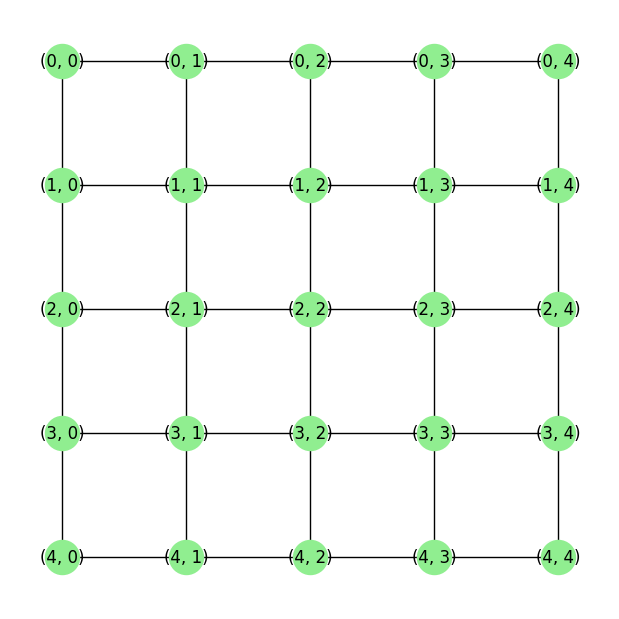

In [13]:
# Generate a single graph
rows, cols = 5, 5
grid_graph = generate_2D_grid_graph(rows, cols)
adjacency_matrix = nx.adjacency_matrix(grid_graph).todense()

plot_graph(grid_graph)

type(grid_graph)

In [14]:
# Brute force
for k in range(1, rows*cols+1):
    for nodes in itertools.combinations(grid_graph.nodes(), k):
        if is_connected_dominating_set(grid_graph, nodes):
            print("Dominating set found:", nodes)
            break

Dominating set found: ((0, 0), (0, 2), (1, 4), (2, 1), (3, 3), (4, 0), (4, 3))
Dominating set found: ((0, 0), (0, 1), (0, 2), (1, 4), (2, 1), (3, 3), (4, 0), (4, 3))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (2, 2), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 2), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (2, 2), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (3, 0), (3, 4), (4, 2))
Dominating set found: ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (3, 0), (3, 4), (4, 2))
D